<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [ ]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# View last 5 rows Hint: Use tail() method

**Observations and Insights: _____**

### **Let us check the data types and and missing values of each column**

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,438
Engine,150


In [ ]:
data['Location'].value_counts()

,count
Location,
Mumbai,949
Hyderabad,876
Coimbatore,772
Kochi,772
Pune,765
Delhi,660
Kolkata,654
Chennai,591
Jaipur,499


In [ ]:
data[data['Price'] >110]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,230.0,160.0
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,120.0


In [ ]:
#data[data['Price'] > 110].drop( axis = 0, inplace = True)# dropping the two cars with price of 160 lakhs and 120 lakhs
#data = data[~data['Price'] > 110]
index_to_drop = data[data['Price'] > 110].index
data.drop(index_to_drop, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Name               7251 non-null   object 
 2   Location           7251 non-null   object 
 3   Year               7251 non-null   int64  
 4   Kilometers_Driven  7251 non-null   int64  
 5   Fuel_Type          7251 non-null   object 
 6   Transmission       7251 non-null   object 
 7   Owner_Type         7251 non-null   object 
 8   Mileage            7249 non-null   float64
 9   Engine             7205 non-null   float64
 10  Power              7076 non-null   float64
 11  Seats              7198 non-null   float64
 12  New_price          1005 non-null   float64
 13  Price              6017 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 849.7+ KB


In [ ]:
#data[data['Fuel_Type']=='Electric'].drop('Fuel_Type', axis = 1, inplace = True)# dropping the two electric vehicle entries
data = data[data['Fuel_Type'] != 'Electric']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7249 non-null   int64  
 1   Name               7249 non-null   object 
 2   Location           7249 non-null   object 
 3   Year               7249 non-null   int64  
 4   Kilometers_Driven  7249 non-null   int64  
 5   Fuel_Type          7249 non-null   object 
 6   Transmission       7249 non-null   object 
 7   Owner_Type         7249 non-null   object 
 8   Mileage            7249 non-null   float64
 9   Engine             7203 non-null   float64
 10  Power              7074 non-null   float64
 11  Seats              7196 non-null   float64
 12  New_price          1004 non-null   float64
 13  Price              6015 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 849.5+ KB


In [ ]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,46


**Observations and Insights: _____**

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [ ]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop("S.No.", axis = 1, inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7249.000000,7.249000e+03,7249.000000,7203.000000,7074.000000,7196.000000,1004.000000,6015.000000
mean,2013.365154,5.871414e+04,18.143864,1616.073580,112.697651,5.280989,22.582460,9.434941
std,3.254654,8.444762e+04,4.560390,593.443444,53.207920,0.808557,27.003381,10.929253
min,1996.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.200000,1198.000000,75.000000,5.000000,7.880000,3.500000
50%,2014.000000,5.349700e+04,18.160000,1493.000000,94.000000,5.000000,11.540000,5.630000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,25.847500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,100.000000


In [ ]:
data[data['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,NaN


**Observations and Insights: _____**

Price-   mean 9.479468, median 5.640000


### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object']
data.describe(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7249,7249,7249,7249,7249
unique,2037,11,4,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,948,3851,5204,5949


**Number of unique observations in each category**

In [ ]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:

    print("For column:", column)

    print(data[column].value_counts())

    print('-'*50)

For column: Name
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Volkswagen Vento Diesel Breeze           1
Mahindra Quanto C6                       1
Hyundai i10 Asta 1.2 AT with Sunroof     1
Toyota Etios Liva 1.4 GD                 1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2037, dtype: int64
--------------------------------------------------
For column: Location
Location
Mumbai        948
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          765
Delhi         659
Kolkata       654
Chennai       590
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Fuel_Type
Diesel    3851
Petrol    3324
CNG         62
LPG         12
Name: count, dtyp

#### **Observations and Insights: _____**

**Think About It**:

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [ ]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven",ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328, axis = 0, inplace = True)

**Check Mileage extreme values**

In [ ]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage").head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,NaN,0.65
6205,Hyundai Santro Xing GL,Ahmedabad,2007,78000,Petrol,Manual,First,0.0,1086.0,62.0,5.0,NaN,NaN
3645,Hyundai Santro Xing XP,Bangalore,2004,167000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.35
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.66
3516,Hyundai Santro GLS I - Euro I,Pune,2011,65400,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,2.10
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
3271,Hyundai Santro Xing GL,Bangalore,2008,35268,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.88
3210,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,2016,22769,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,NaN,49.22
3189,Hyundai Santro GS zipDrive - Euro II,Chennai,2002,67000,Petrol,Manual,Third,0.0,999.0,NaN,5.0,NaN,1.20
3093,Audi A7 2011-2015 Sportback,Kolkata,2012,24720,Diesel,Automatic,Second,0.0,2967.0,241.4,5.0,NaN,28.00


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

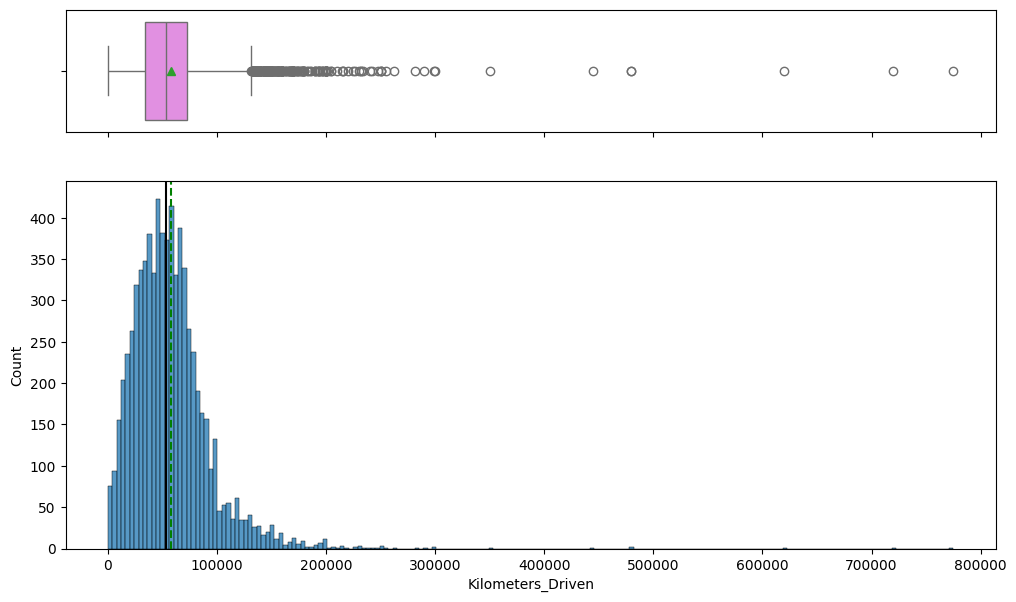

In [ ]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data, 'Kilometers_Driven')

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

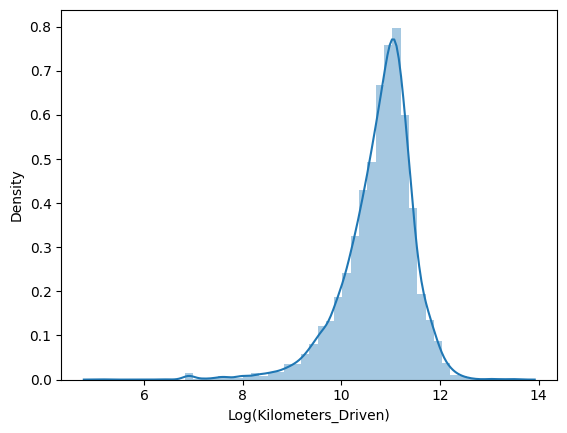

In [ ]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

In [ ]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

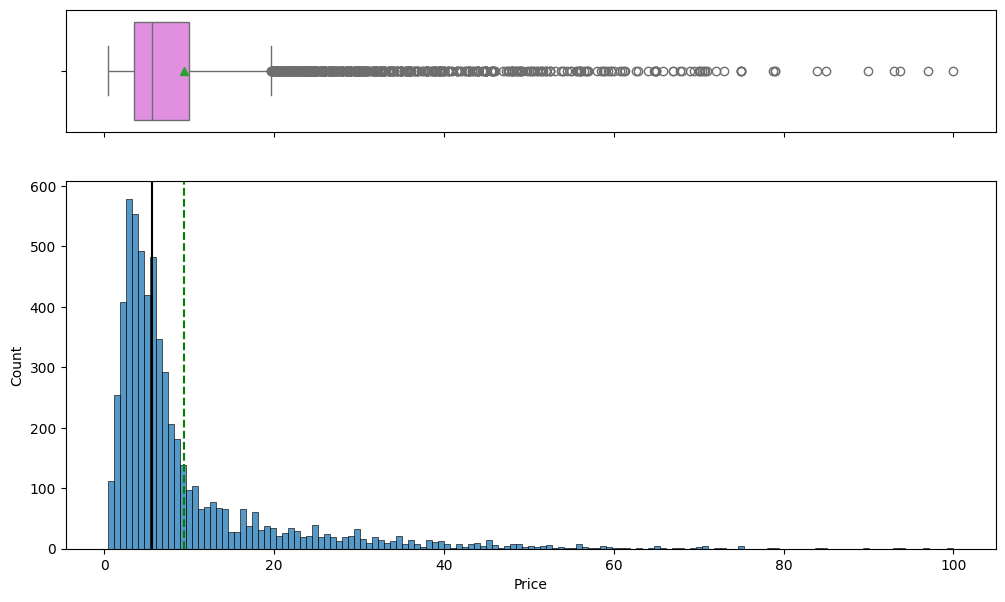

In [ ]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data, 'Price')
#lots of outliers, it has a rightskew, it has a median of about 5000, and a mean of about 10,000

<Axes: xlabel='Log(Price)', ylabel='Density'>

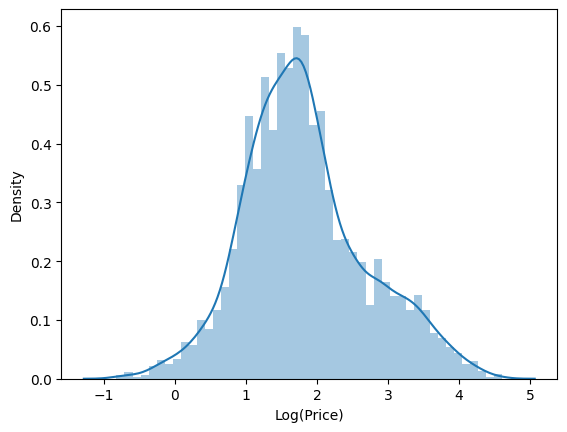

In [ ]:
# Log transformation of the feature 'Price'
data["Price_Log"]=np.log(data["Price"])
sns.distplot(data["Price_Log"], axlabel = "Log(Price)")

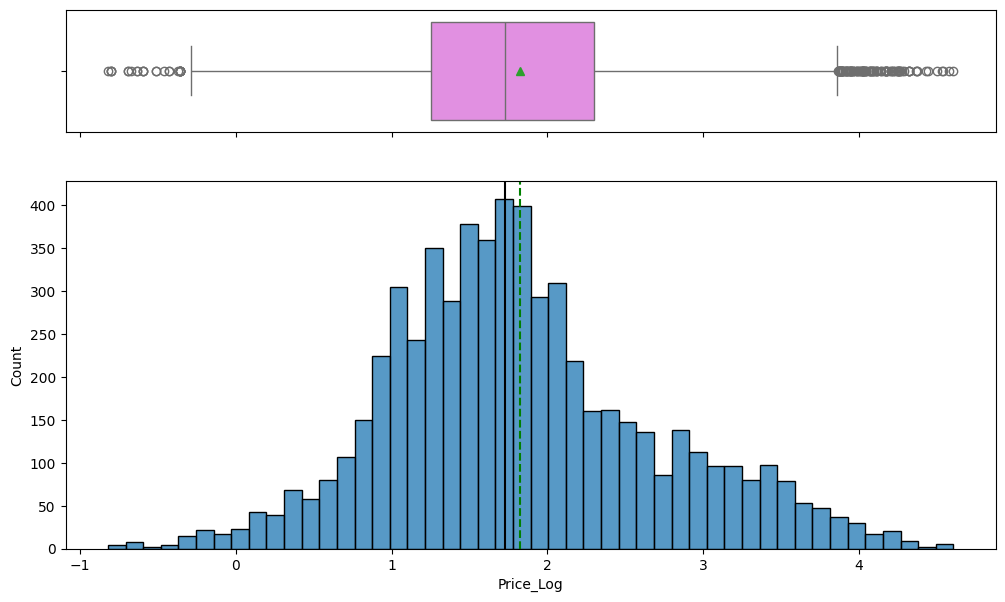

In [ ]:
histogram_boxplot(data, 'Price_Log')

In [ ]:
# We can Add a transformed Price feature in data


**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7248 non-null   object 
 1   Location               7248 non-null   object 
 2   Year                   7248 non-null   int64  
 3   Kilometers_Driven      7248 non-null   int64  
 4   Fuel_Type              7248 non-null   object 
 5   Transmission           7248 non-null   object 
 6   Owner_Type             7248 non-null   object 
 7   Mileage                7248 non-null   float64
 8   Engine                 7202 non-null   float64
 9   Power                  7073 non-null   float64
 10  Seats                  7195 non-null   float64
 11  New_price              1004 non-null   float64
 12  Price                  6014 non-null   float64
 13  kilometers_driven_log  7248 non-null   float64
 14  Price_Log              6014 non-null   float64
dtypes: float6

**Observations and Insights for all the plots: _____**


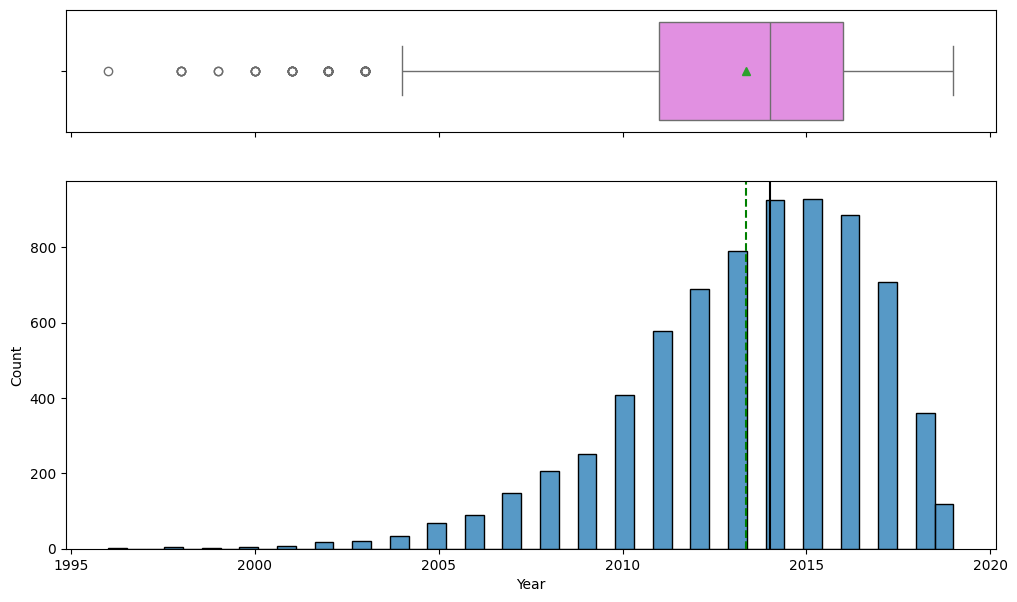

In [ ]:
histogram_boxplot(data, 'Year')

In [ ]:
#data["Year_Log"]=np.log(data["Year"])
#sns.distplot(data["Year_Log"], axlabel = "Log(Year)");

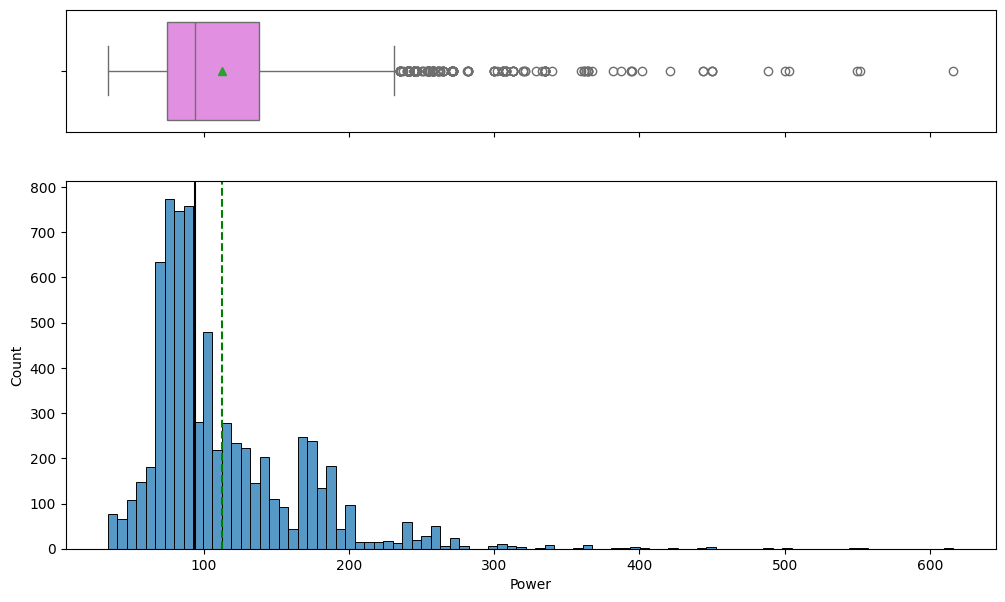

In [ ]:
histogram_boxplot(data, "Power")

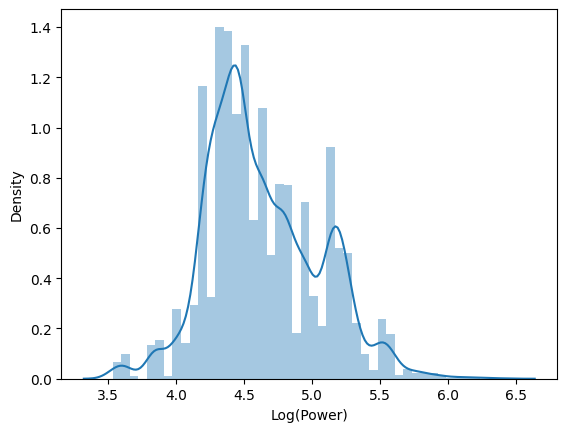

In [ ]:
data["Power_Log"]=np.log(data["Power"])
sns.distplot(data["Power_Log"], axlabel = "Log(Power)");

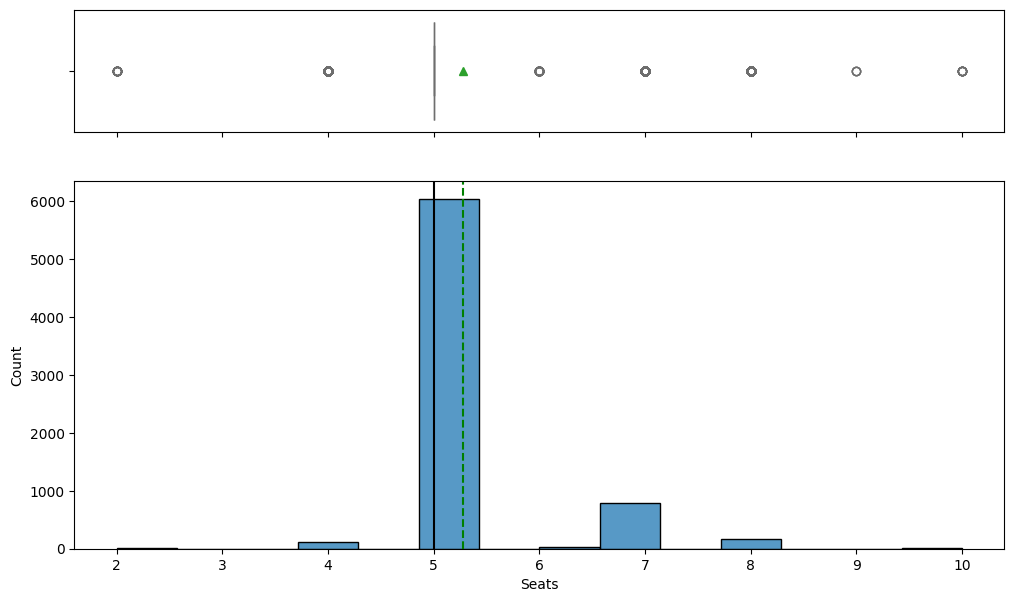

In [ ]:
histogram_boxplot(data, "Seats")

## **2. Univariate analysis - Categorical Data**

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.


def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

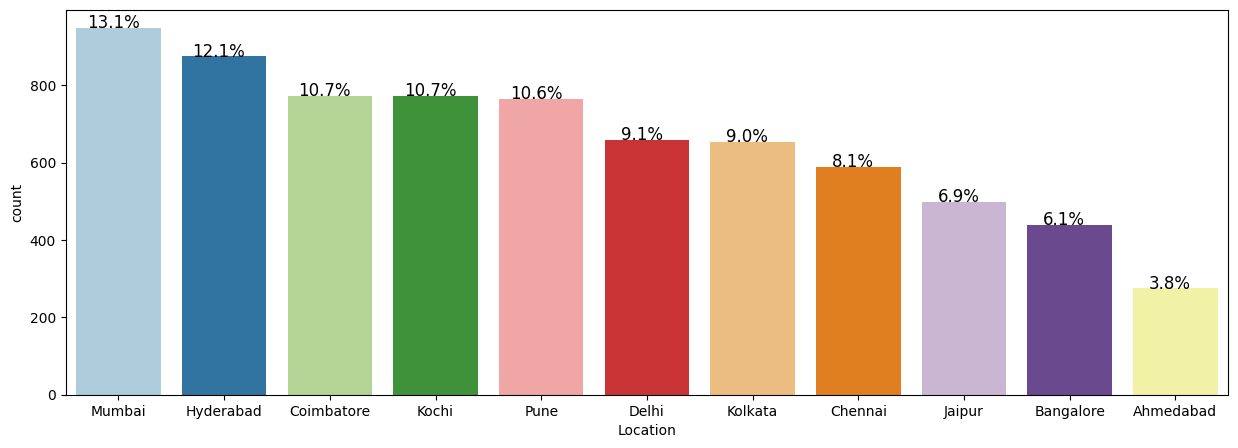

In [ ]:
# Bar Plot for 'Location'
perc_on_bar(data, 'Location')

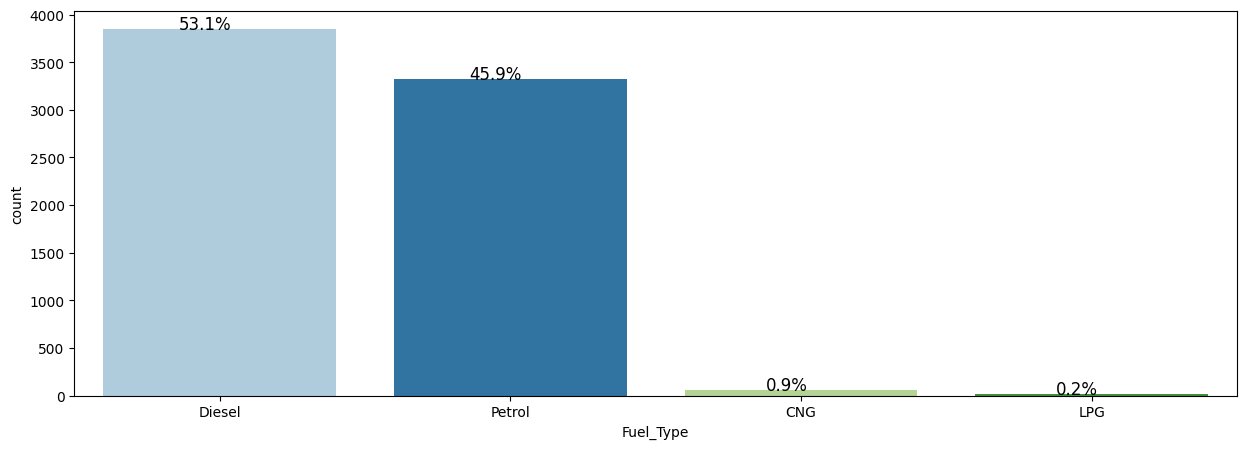

In [ ]:
perc_on_bar(data, 'Fuel_Type')

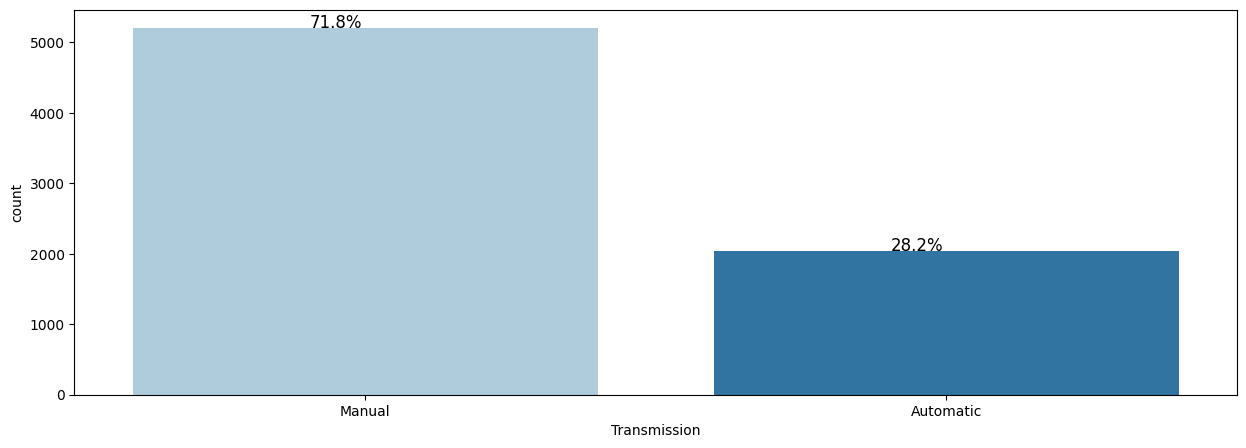

In [ ]:
perc_on_bar(data, 'Transmission')

There are only two types of transmissions, Manual and Automatic.
72% of the cars have manual transmissions and the remaining 28% are automatic.

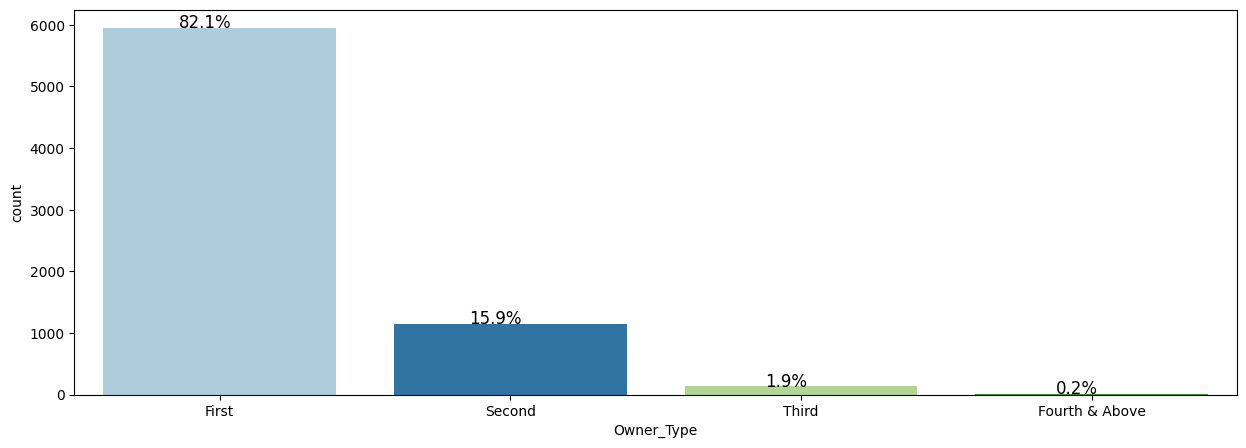

In [ ]:
perc_on_bar(data, 'Owner_Type')

82% of owners of the cars are first owners. The second owners constitute 16% of the total amount.

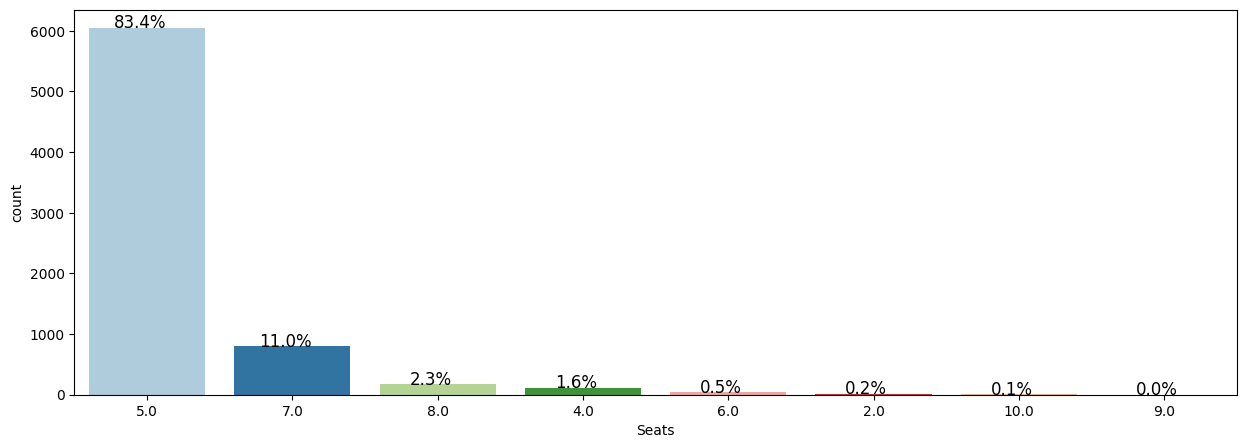

In [ ]:
perc_on_bar(data, 'Seats')

By far the highest percent of cars(83%) have 5 seats, compared to other second most popular option, that with 7 seats which are only 11%.The cars with other numbers of seats which range all the way from 2 to 10 have very low percentage.

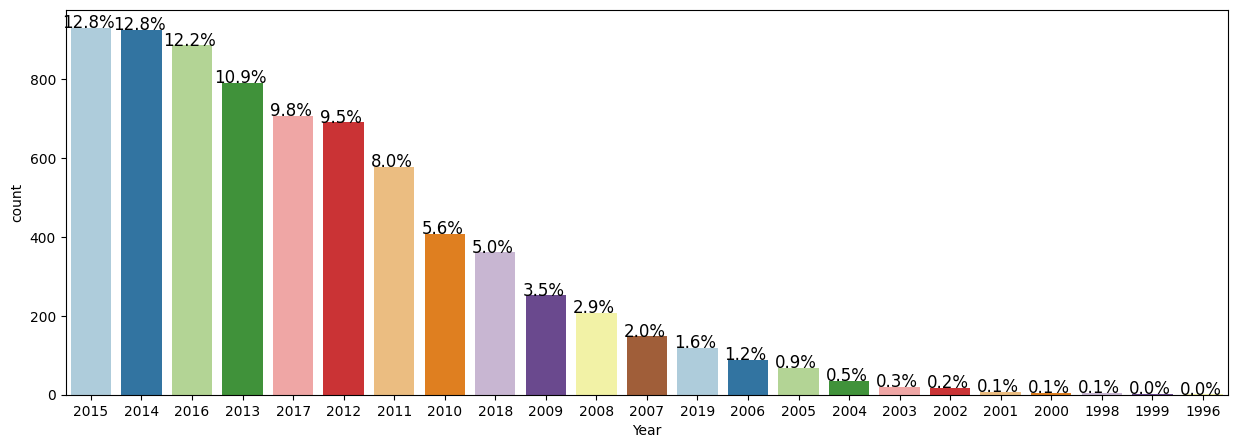

In [ ]:
perc_on_bar(data, 'Year')

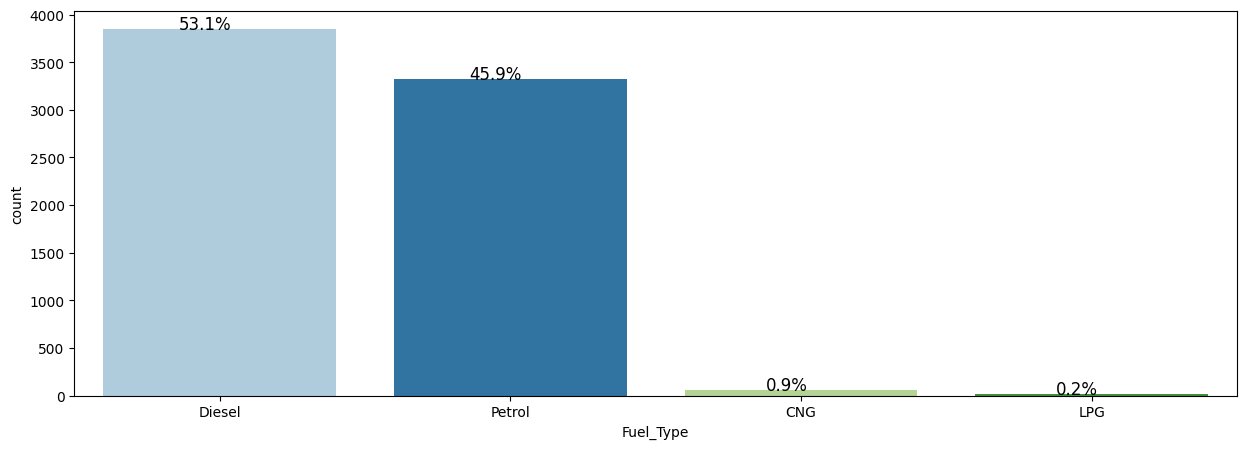

In [ ]:
perc_on_bar(data, 'Fuel_Type')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables.

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

Text(0.5, 1.0, 'Price vs Year')

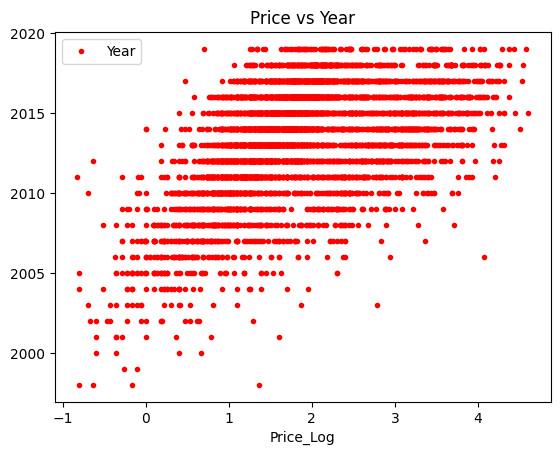

In [ ]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_Log', y = 'Year', style = '.', color = 'red')
plt.title('Price vs Year')

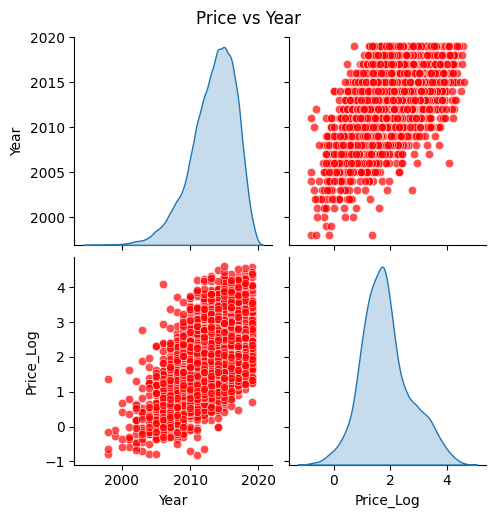

In [ ]:
# Create the pair plot
sns.pairplot(data, vars=['Year', 'Price_Log'], kind='scatter', diag_kind='kde', plot_kws={'color': 'red', 'alpha': 0.7})

# Set the title
plt.suptitle('Price vs Year', y=1.02)

# Show the plot
plt.show()

In [ ]:
# prompt: interpret the plot

# Observations and Insights from the provided code and plots:

# 1. Data Cleaning and Preprocessing:
#    - The 'S.No.' column was removed as it's an index and not relevant for prediction.
#    - An outlier in 'Kilometers_Driven' (a car with 6.5 million km driven in 2017) was removed.
#    - Zero values in 'Mileage' are identified as potential errors and will likely be handled in the feature engineering step.

# 2. Univariate Analysis:
#    - Numerical Features:
#      - 'Kilometers_Driven' and 'Price' are highly right-skewed. Log transformations ('kilometers_driven_log' and 'price_log') were applied to reduce skewness and improve model performance.  Skewed data can negatively impact many machine learning models.
#      - Other numerical features like 'Year', 'Power', and 'Seats' were also analyzed using histograms and box plots. The code suggests checking distributions and outliers for these features as well.
#    - Categorical Features:
#      - Bar plots were created for categorical variables like 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', and 'Seats'. These plots show the distribution of each category. For example, the majority of cars have manual transmissions, are first-owned, and have 5 seats.
#      - The percentage of each category is displayed on each bar in the bar plot, giving the relative proportions of car characteristics.

# 3. Bivariate Analysis:
#    - A scatter plot and pair plot were used to visualize the relationship between 'Year' and 'Price' (using the log-transformed 'Price_Log'). This would help determine if there's a correlation between the car's manufacturing year and its price, and whether this relationship is linear or not.  The pair plot also shows the distributions of the two variables as kde plots along the diagonal.

# Overall:
# The code performs initial data exploration and cleaning, applies data transformations for better modeling, and starts investigating relationships between variables. Further analysis is needed to identify correlations, handle missing values ('Mileage'), and prepare the data for model building.

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<Figure size 1200x700 with 0 Axes>

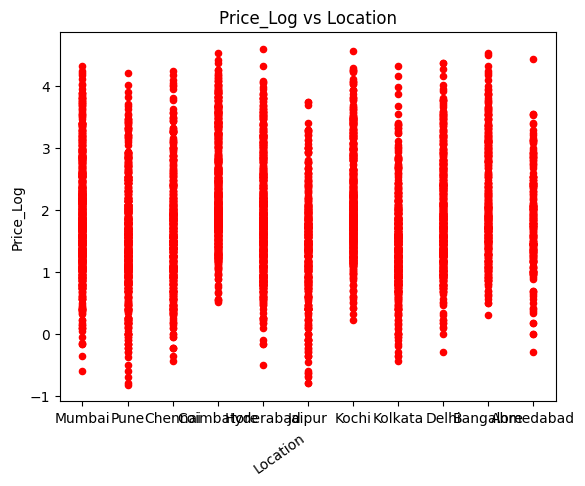

<Figure size 1200x700 with 0 Axes>

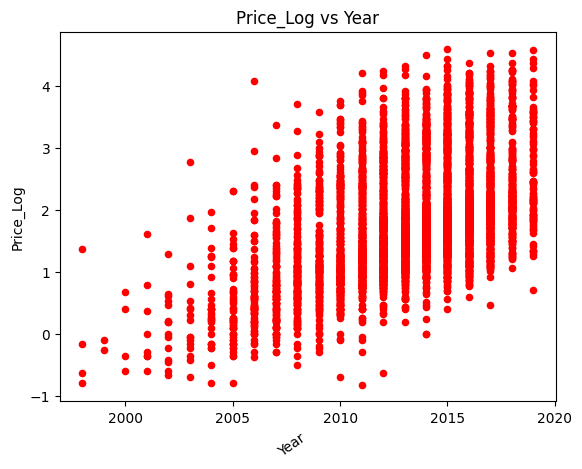

<Figure size 1200x700 with 0 Axes>

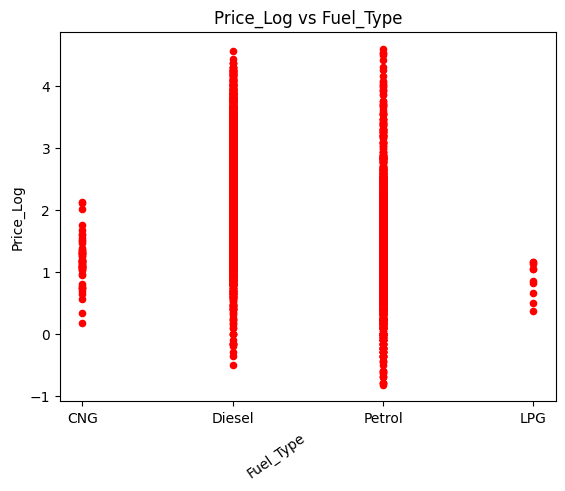

<Figure size 1200x700 with 0 Axes>

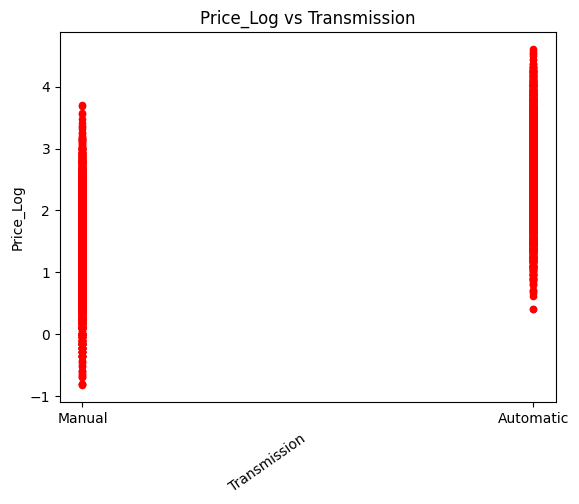

<Figure size 1200x700 with 0 Axes>

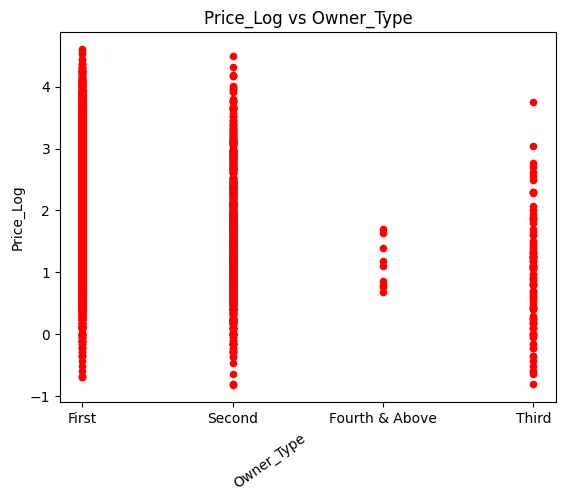

<Figure size 1200x700 with 0 Axes>

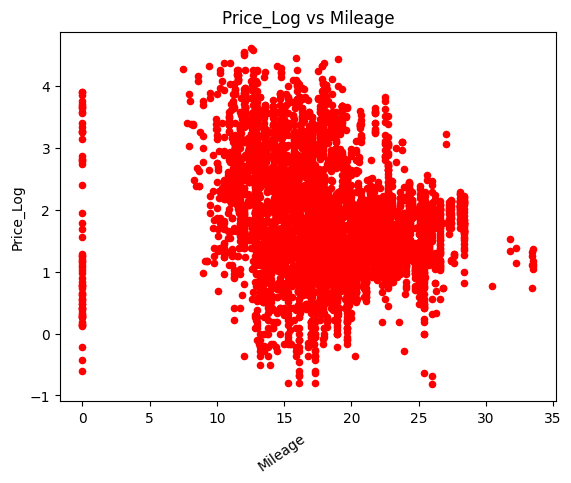

<Figure size 1200x700 with 0 Axes>

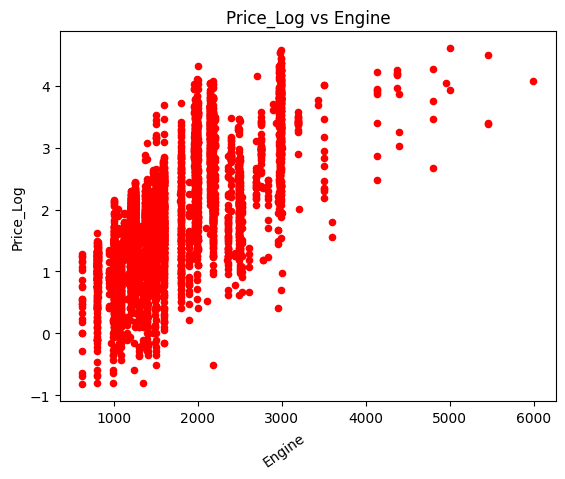

<Figure size 1200x700 with 0 Axes>

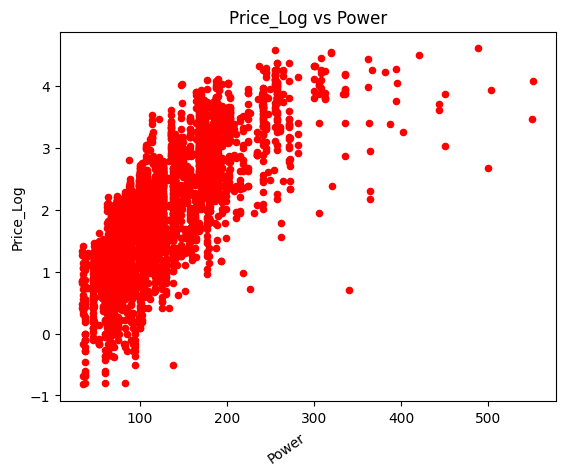

<Figure size 1200x700 with 0 Axes>

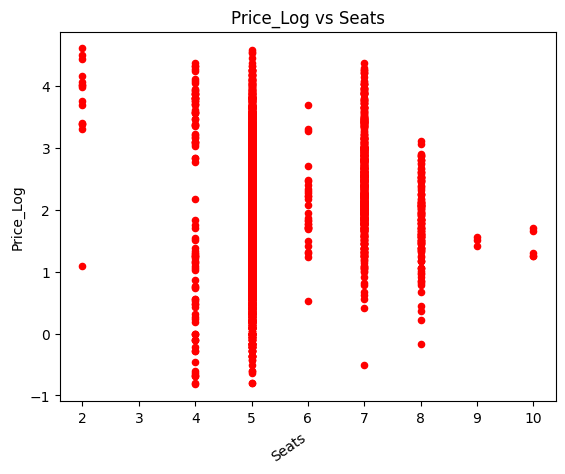

<Figure size 1200x700 with 0 Axes>

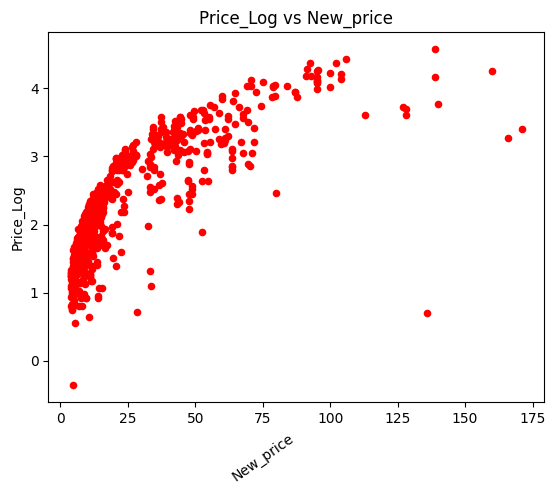

<Figure size 1200x700 with 0 Axes>

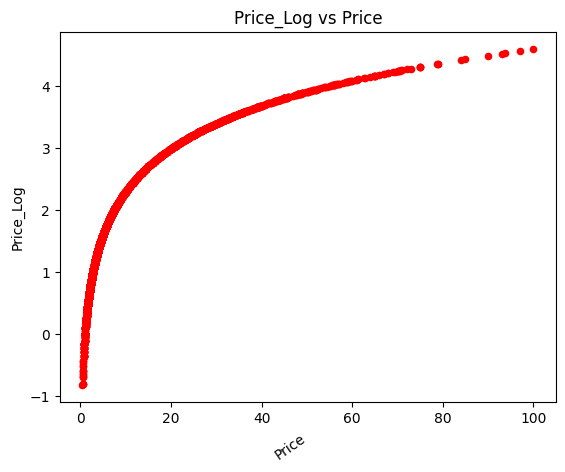

<Figure size 1200x700 with 0 Axes>

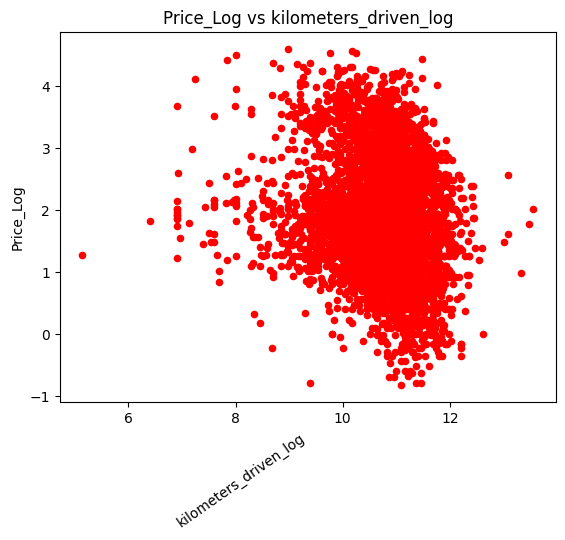

<Figure size 1200x700 with 0 Axes>

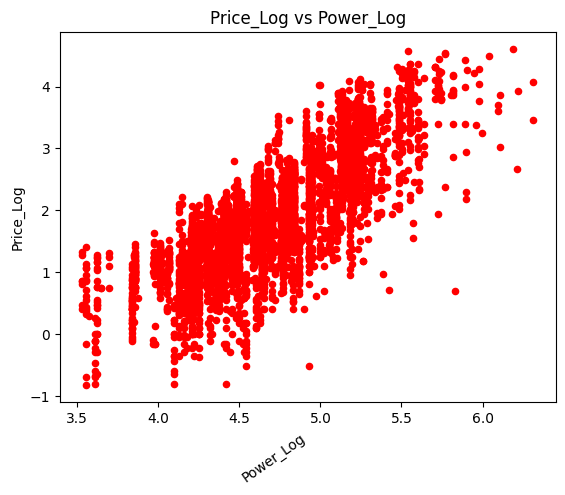

In [ ]:
for i in data.columns:
    if i != 'Price_Log' and i != 'Name' and i!='Kilometers_Driven':  # Skip plotting 'Price_Log' against itself
        plt.figure(figsize=(12, 7))
        data.plot(kind='scatter', y='Price_Log', x=i, style='.', color='red')  # Scatter plot
        plt.title(f'Price_Log vs {i}')  # Dynamic title
        plt.ylabel('Price_Log')  # Label x-axis
        plt.xlabel(i, rotation=35, ha='right') # Label y-axis
        plt.show()

**Observations and Insights from all plots: _____**
There is a positive correlation between year and price


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7248 non-null   object 
 1   Location               7248 non-null   object 
 2   Year                   7248 non-null   int64  
 3   Kilometers_Driven      7248 non-null   int64  
 4   Fuel_Type              7248 non-null   object 
 5   Transmission           7248 non-null   object 
 6   Owner_Type             7248 non-null   object 
 7   Mileage                7248 non-null   float64
 8   Engine                 7202 non-null   float64
 9   Power                  7073 non-null   float64
 10  Seats                  7195 non-null   float64
 11  New_price              1004 non-null   float64
 12  Price                  6014 non-null   float64
 13  kilometers_driven_log  7248 non-null   float64
 14  Price_Log              6014 non-null   float64
 15  Power_Log

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

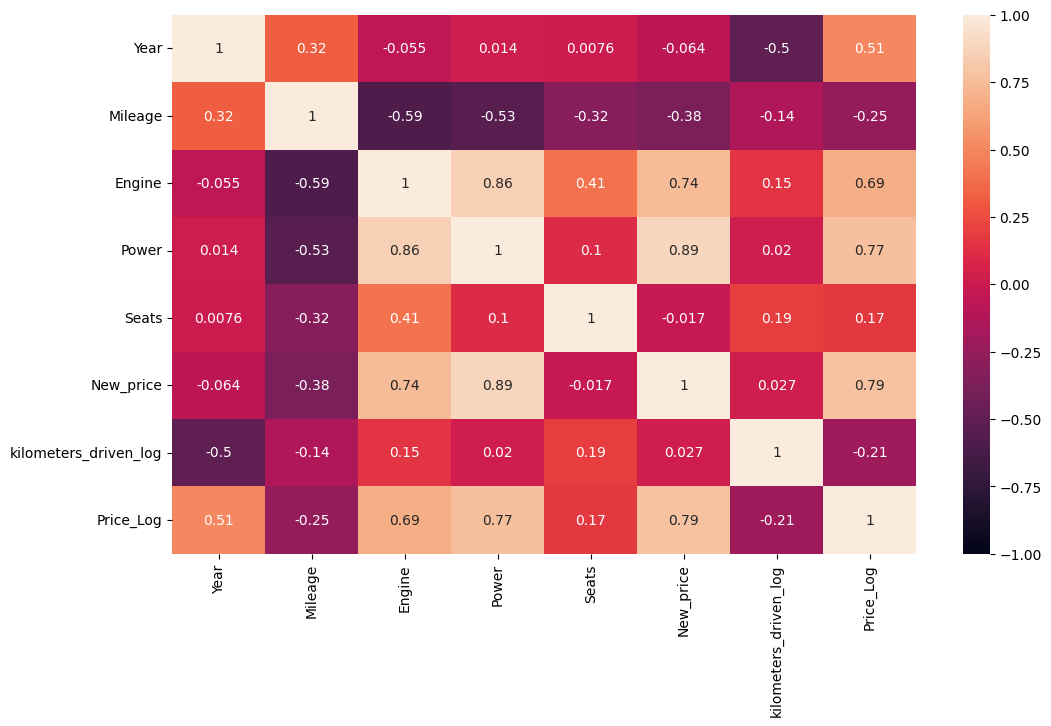

In [ ]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Price','Kilometers_Driven','Power_Log'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1)

plt.show()

Engine and Mileage are highly negatively correlated.
Power and Mileage are negatively related.
Kilometers_Driven_Log and Year are highly negatively correlated
Power and Engine are strongly positively correlated


**Observations and Insights: _____**

### **3. Box plot**

In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):

    plt.figure(figsize = (12, 5)) # Setting size of boxplot

    sns.boxplot(x = z, y = data['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers

    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

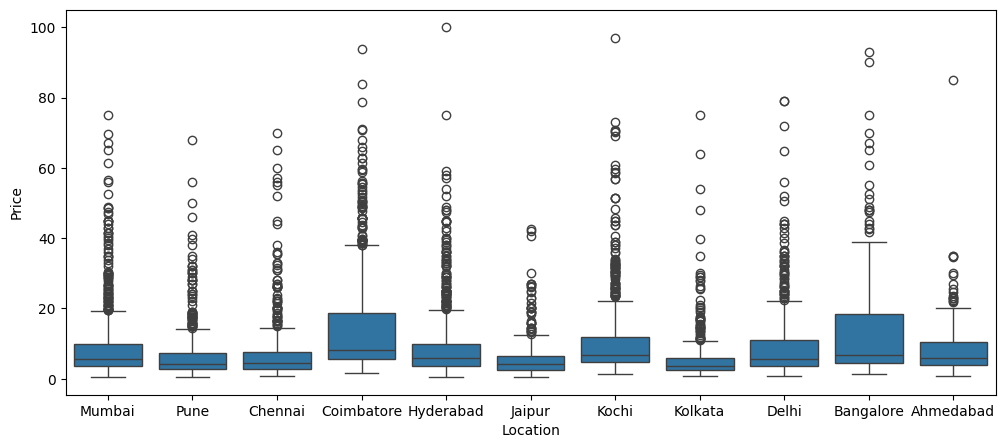

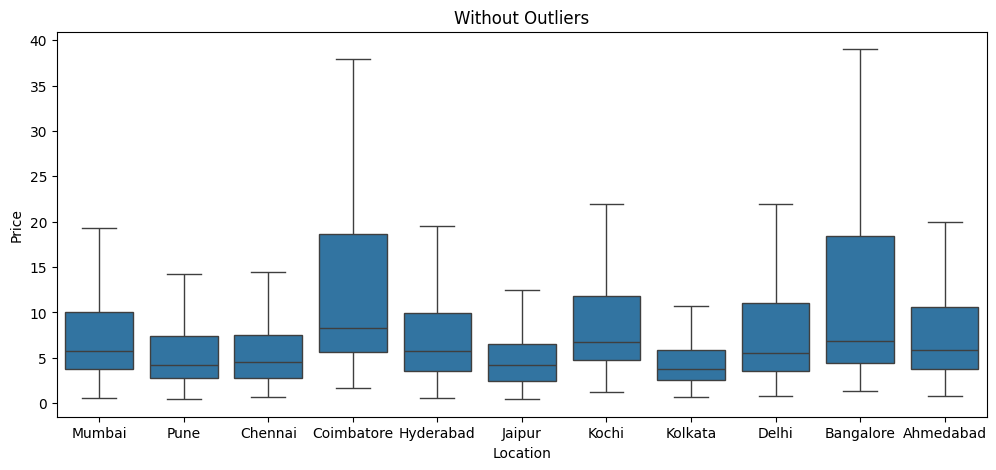

In [ ]:
# Box Plot: Price vs Location
boxplot(data['Location'])

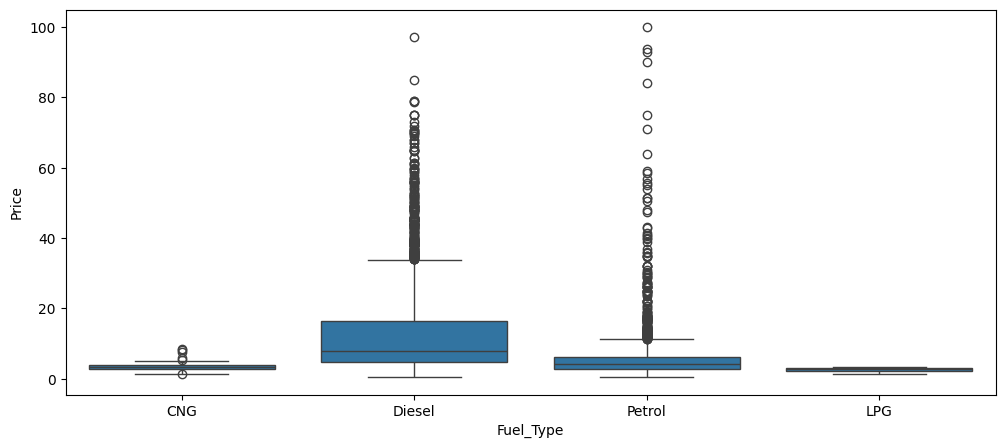

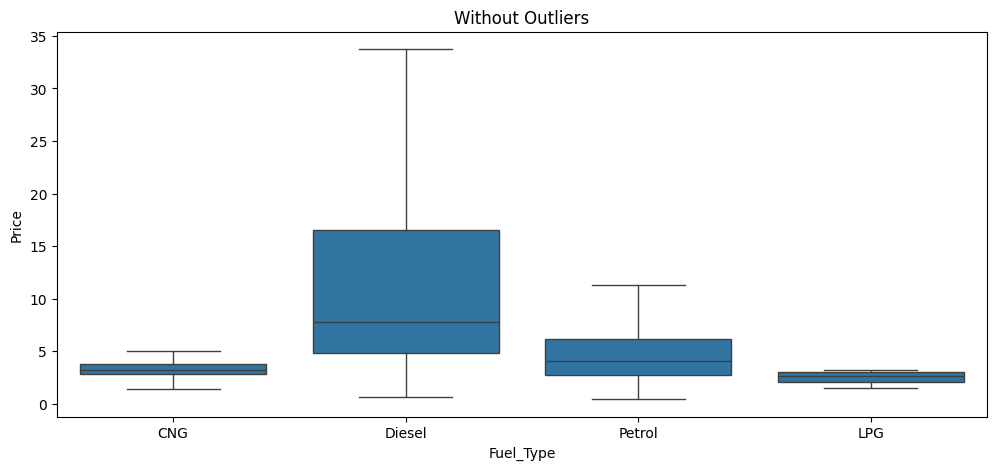

In [ ]:
boxplot(data['Fuel_Type'])

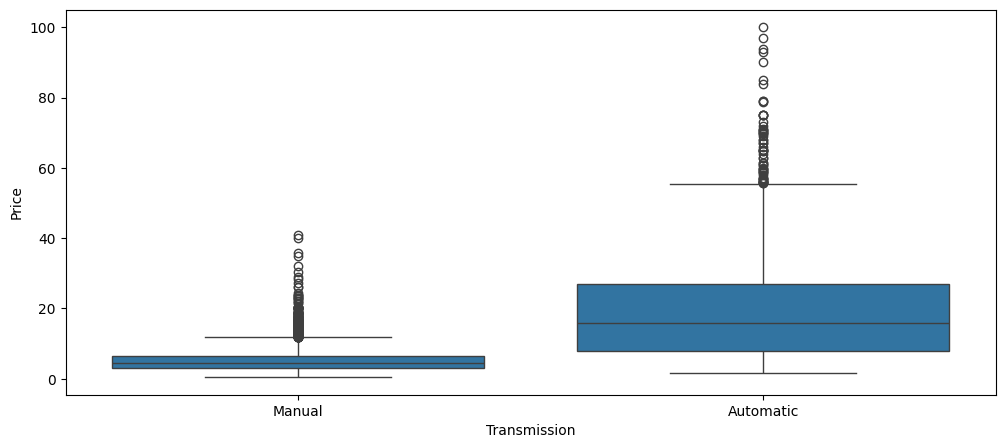

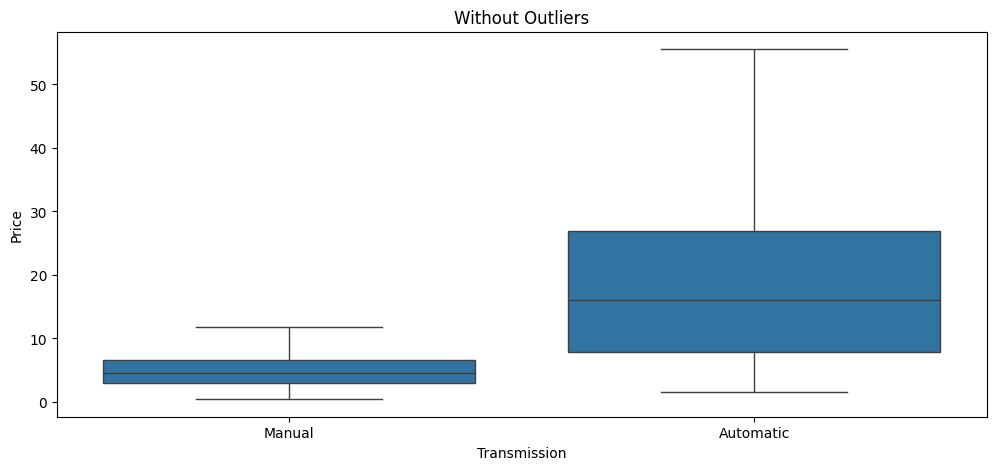

In [ ]:
boxplot(data['Transmission'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

In [ ]:
data["Name"].nunique()

2037

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

In [ ]:
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,4.063198,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,4.837868,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,4.485260,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,4.485936,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,4.947340,audi,a4


In [ ]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

#### **Observations and Insights: _____**

### **Missing value treatment**

In [ ]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,46
Power,175


#### **Observations and Insights: _____**

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas
for brand in data['Brand'].unique():
    for model in data[data['Brand'] == brand]['Model'].unique():
        mode_seats = data[(data['Brand'] == brand) & (data['Model'] == model)]['Seats'].mode()
        data.loc[(data['Brand'] == brand) & (data['Model'] == model) & (data['Seats'].isnull()), 'Seats'] = mode_seats

In [ ]:
mode_seats

,Seats
0,5.0


In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,NaN,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,NaN,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,4.59512,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,NaN,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,NaN,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,NaN,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,NaN,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,NaN,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,NaN,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,4.60517,honda,city


In [ ]:
data[(data['Brand'] == 'maruti') & (data['Engine']==1061.00)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
35,Maruti Wagon R LXI BSIII,Jaipur,2009,83816,Petrol,Manual,Second,14.0,1061.0,64.0,5.0,NaN,1.85,11.336379,0.615186,4.158883,maruti,wagon
292,Maruti Wagon R LXI Minor,Delhi,2009,60000,Petrol,Manual,First,18.9,1061.0,67.0,5.0,NaN,1.35,11.002100,0.300105,4.204693,maruti,wagon
403,Maruti Wagon R LXI BSIII,Pune,2013,53000,Petrol,Manual,First,14.0,1061.0,64.0,5.0,NaN,2.75,10.878047,1.011601,4.158883,maruti,wagon
930,Maruti Zen Estilo 1.1 LXI BSIII,Bangalore,2007,60000,Petrol,Manual,Second,18.2,1061.0,64.0,5.0,NaN,1.65,11.002100,0.500775,4.158883,maruti,zen
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3,1061.0,57.5,5.0,NaN,1.45,11.070163,0.371564,4.051785,maruti,wagon
994,Maruti Wagon R VXI Minor,Chennai,2010,134000,Petrol,Manual,Second,18.9,1061.0,67.0,5.0,NaN,1.65,11.805595,0.500775,4.204693,maruti,wagon
1003,Maruti Wagon R LXI Minor,Chennai,2008,55000,Petrol,Manual,Second,18.9,1061.0,67.0,5.0,NaN,1.75,10.915088,0.559616,4.204693,maruti,wagon
1276,Maruti Wagon R LXI Minor,Jaipur,2006,65000,Petrol,Manual,First,18.9,1061.0,67.0,5.0,NaN,1.50,11.082143,0.405465,4.204693,maruti,wagon
1585,Maruti Wagon R VXI Minor ABS,Kochi,2013,36716,Petrol,Manual,First,18.9,1061.0,67.0,5.0,NaN,3.02,10.510968,1.105257,4.204693,maruti,wagon
1749,Maruti Zen Estilo 1.1 LX BSIII,Kochi,2011,25805,Petrol,Manual,First,18.2,1061.0,64.0,5.0,NaN,2.62,10.158324,0.963174,4.158883,maruti,zen


All Maruti Estillo cars have no information about seats

In [ ]:
data.loc[data['Seats'].isnull(),'Seats']=5.0

In [ ]:
data[data['Seats'].isnull()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


**Missing values for Mileage**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,46
Power,175


In [ ]:
# Impute missing Mileage. For example, use can use median or any other methods.
for brand in data['Brand'].unique():
    for model in data[data['Brand'] == brand]['Model'].unique():
        median_mileage = data[(data['Brand'] == brand) & (data['Model'] == model)]['Mileage'].median()
        data.loc[(data['Brand'] == brand) & (data['Model'] == model) & (data['Mileage']==0.0), 'Mileage'] = median_mileage

In [ ]:
median_mileage

14.2

In [ ]:
data[data['Mileage']==0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67,9.640108,3.574310,5.267858,mercedes-benz,c-class
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.00,11.542484,1.098612,NaN,smart,fortwo
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,52.26,39.50,9.069007,3.676301,5.267858,mercedes-benz,c-class
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99,10.165852,1.944481,NaN,mahindra,jeep
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,NaN,5.0,NaN,0.55,11.156251,-0.597837,NaN,fiat,siena
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00,8.294050,3.555348,5.267858,mercedes-benz,c-class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70,11.225243,0.530628,NaN,mahindra,jeep


In [ ]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


Two cars remain unimputed because they are electric and mileage doesnt make sense for them. These are so few that it would be better to drop them

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Seats'].isnull()]
#done

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


In [ ]:
def impute_missing_by_brand_model(data, column_to_impute):
    """
    Imputes missing values in the specified numerical column
    using the median value for each Brand and Model combination.

    Args:
        data: The pandas DataFrame containing the data.
        column_to_impute: The name of the column to impute.

    Returns:
        The DataFrame with imputed values in the specified column.
    """

    for brand in data['Brand'].unique():
        for model in data[data['Brand'] == brand]['Model'].unique():
            median_value = data[(data['Brand'] == brand) & (data['Model'] == model)][column_to_impute].median()

            # Check if median_value is NaN (if no data for that brand/model)
            if pd.isna(median_value):
                # Handle the case where median is NaN (e.g., use overall median)
                median_value = data[column_to_impute].median()

            data.loc[(data['Brand'] == brand) & (data['Model'] == model) & (data[column_to_impute].isnull()), column_to_impute] = median_value

    return data

**Missing values for Engine**

In [ ]:
# Impute missing values in the column Engine
impute_missing_by_brand_model(data, 'Engine')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,4.063198,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,4.837868,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,4.485260,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,4.485936,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,4.947340,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,4.640537,volkswagen,vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,4.640537,volkswagen,polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,4.144721,nissan,micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,4.640537,volkswagen,polo


In [ ]:
data[data['Engine'].isnull()]
# checked that the values are imputed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


**Missing values for Power**

In [ ]:
# Impute missing values in the column Power
impute_missing_by_brand_model(data, 'Power')
impute_missing_by_brand_model(data, 'Power_Log')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,4.063198,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,4.837868,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,4.485260,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,4.485936,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,4.947340,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,4.640537,volkswagen,vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,4.640537,volkswagen,polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,4.144721,nissan,micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,4.640537,volkswagen,polo


In [ ]:
data[data['Power'].isnull()]
# checked that values are imputed

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


**Missing values for New_price**

In [ ]:
# Impute missing values in the column New_price
impute_missing_by_brand_model(data, 'New_price')
data[data['New_price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log,Brand,Model


In [ ]:
# Drop the rows where 'Price' == NaN
data.dropna(subset=['Price'], inplace=True)

In [ ]:
# Check the null values in the data
data = data[data['Fuel_Type'] != 'Electric']# dropping the two electric vehicles because they are too different
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [ ]:
data = data[data['Fuel_Type'] != 'Electric']
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [ ]:
data.nunique()

,0
Name,1872
Location,11
Year,22
Kilometers_Driven,3091
Fuel_Type,4
Transmission,2
Owner_Type,4
Mileage,430
Engine,144
Power,370


In [ ]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_Log,Power_Log
count,6014.000000,6014.000000,6014.00000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000
mean,2013.357333,57685.535584,18.29087,1619.396408,112.498525,5.278351,19.574327,9.425702,10.758395,1.823429,4.631238
std,3.269967,37882.748423,4.22062,598.111556,53.328026,0.802669,22.609163,10.906644,0.712755,0.871952,0.415425
min,1998.000000,171.000000,0.00000,624.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981,3.532226
25%,2011.000000,34000.000000,15.29000,1198.000000,74.000000,5.000000,7.920000,3.500000,10.434116,1.252763,4.304065
50%,2014.000000,53000.000000,18.16000,1493.000000,93.700000,5.000000,10.250000,5.630000,10.878047,1.728109,4.540098
75%,2016.000000,73000.000000,21.10000,1984.000000,138.100000,5.000000,16.950000,9.950000,11.198215,2.297573,4.927978
max,2019.000000,775000.000000,33.54000,5998.000000,552.000000,10.000000,171.000000,100.000000,13.560618,4.605170,6.313548


**Observations for missing values after imputing: _____**

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [ ]:
# Step-1
X = data.drop(['Name','Price','Price_Log','Kilometers_Driven','kilometers_driven_log',"Power"], axis = 1)

y = data[["Price_Log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)
import statsmodels.api as sm
X= sm.add_constant(X)

In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4209, 259) (1805, 259)


263 is the number of features because it is the same for both test and train.
the other two numbers are number of rows

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4209 entries, 1518 to 5161
Columns: 259 entries, const to Model_zest
dtypes: bool(252), float64(6), int64(1)
memory usage: 1.3 MB


In [ ]:
# Import statsmodels
'''import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)'''

'import statsmodels.api as sm\nX_train = sm.add_constant(X_train)\nX_test = sm.add_constant(X_test)'

In [ ]:
# Import statsmodels
'''import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Import VIF function


def checking_vif(train):
    vif = pd.DataFrame()

    # Select only numerical features for VIF calculation
    numerical_features = train.select_dtypes(include=np.number).columns
    train_numerical = train[numerical_features]

    vif["feature"] = train_numerical.columns  # Assign numerical features to 'feature' column


    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train_numerical.values, i)
                  for i in range(len(train_numerical.columns))]

    return vif # Return the DataFrame with VIF values for numerical features'''

'import statsmodels.api as sm\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor  # Import VIF function\n\n\ndef checking_vif(train):\n    vif = pd.DataFrame()\n\n    # Select only numerical features for VIF calculation\n    numerical_features = train.select_dtypes(include=np.number).columns\n    train_numerical = train[numerical_features]\n\n    vif["feature"] = train_numerical.columns  # Assign numerical features to \'feature\' column\n\n\n    # Calculating VIF for each feature\n    vif["VIF"] = [variance_inflation_factor(train_numerical.values, i)\n                  for i in range(len(train_numerical.columns))]\n\n    return vif # Return the DataFrame with VIF values for numerical features'

In [ ]:
'''checking_vif(X_train)'''

'checking_vif(X_train)'

In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

<hr>

In [ ]:
data['Price_Log'].mean()#checking if all values in price log are numbers

1.8234286724086195

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_Log'])

LinearRegression()

In [ ]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.936544907953583
R-square on test set :  0.8919057927475494
RMSE on training set :  2.742541985011851
RMSE on test set :  3.5989042144041443


**Observations from results: _____**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [ ]:
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)
X_test1 = X_test.astype(float)
# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train1)

# Add constant to test data
x_test = sm.add_constant(X_test1)

def build_ols_model(x_train):

    # Create the model
    olsmodel = sm.OLS(y_train["Price_Log"], x_train)

    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     404.7
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:36:25   Log-Likelihood:                 1283.3
No. Observations:                4209   AIC:                            -2117.
Df Residuals:                    3984   BIC:                            -688.9
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Model_eon,-0.255818,0.049341
Model_hexa,-0.297040,0.048443
Model_sl-class,0.436672,0.033663
Location_Pune,-0.038892,0.031768
Location_Mumbai,-0.039194,0.026041
...,...,...
Brand_volkswagen,-6.817797,0.000000
Brand_volvo,-5.924094,0.000000
Year,0.116717,0.000000
Model_d-max,-3.889965,0.000000


In [ ]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Location', 'New_price', 'Brand', 'Owner_Type', 'Transmission', 'Power', 'Power_Log', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create a Ridge regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Ridge Regression
ridge_model = Ridge(alpha=10.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=.10)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# Fit Ridge regression model

In [ ]:
# Get score of the model
# Ridge Regression
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression:")
print("RMSE:", ridge_rmse)
print("R-squared:", ridge_r2)

# Lasso Regression
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print("\nLasso Regression:")
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r2)


Ridge Regression:
RMSE: 3.3067290677457155
R-squared: 0.8818609105197817

Lasso Regression:
RMSE: 4.016478583667915
R-squared: 0.7838838053235833


**Observations from results: _____**
Ridge Regression:

RMSE: 3.5004260159017138
RMSE (Root Mean Squared Error) represents the average difference between the predicted values and the actual values of the target variable. In this case, the average difference between the predicted 'price_log' and the actual 'price_log' is about 3.5 units. To get this back on the price scale, consider exponentiating these numbers, but note this introduces bias.
R-squared: 0.8691740979027562
R-squared indicates the proportion of the variance in the target variable that is explained by the model. In this case, the Ridge Regression model explains about 86.9% of the variance in the 'price_log' variable.
Interpretation: The Ridge Regression model demonstrates good performance, with a relatively low RMSE and a high R-squared. This suggests that the model is able to accurately predict the 'price_log' and explains a substantial portion of the variance in the data.

Lasso Regression:

RMSE: 4.2944229506003255
The average difference between predicted 'price_log' and the actual 'price_log' is about 4.3 units.
R-squared: 0.7040329980529093
The Lasso Regression model explains about 70.4% of the variance in the 'price_log' variable.
Interpretation: The Lasso Regression model's performance is less impressive compared to Ridge Regression. It has a higher RMSE and a lower R-squared, indicating less accurate predictions and a lower ability to explain the variance in the data.

Comparison and Conclusions:

Ridge vs. Lasso: In this case, Ridge Regression appears to be a better choice for this dataset compared to Lasso Regression. It has a lower RMSE and a higher R-squared, suggesting better predictive accuracy and a better fit to the data.
Regularization: The difference in performance between Ridge and Lasso is likely due to the nature of the regularization applied. Ridge Regression shrinks coefficients towards zero, while Lasso can set some coefficients to exactly zero, effectively performing feature selection. If your dataset has many irrelevant or redundant features, Lasso might be more effective in improving generalization. However, if all features are somewhat relevant, Ridge might perform better.
Further Considerations:
Hyperparameter Tuning: It's crucial to further tune the alpha parameter for both Ridge and Lasso using techniques like cross-validation to ensure optimal performance.
Feature Engineering: Exploring additional feature engineering options could potentially improve the performance of both models.
Domain Knowledge: Consider if the results and selected features align with your understanding of the data and the problem domain.
Based on these results, Ridge Regression is likely a more suitable model for this dataset with the current feature set. However, further exploration and refinement might reveal further insights and potential improvements in the prediction of used car prices.

**Ridge Regression:**

- **RMSE:** 3.5004260159017138
    - RMSE (Root Mean Squared Error) represents the average difference between the predicted values and the actual values of the target variable. In this case, the average difference between the predicted 'price_log' and the actual 'price_log' is about 3.5 units. To get this back on the price scale, consider exponentiating these numbers, but note this introduces bias.
- **R-squared:** 0.8691740979027562
    - R-squared indicates the proportion of the variance in the target variable that is explained by the model. In this case, the Ridge Regression model explains about 86.9% of the variance in the 'price_log' variable.

**Interpretation:** The Ridge Regression model demonstrates good performance, with a relatively low RMSE and a high R-squared. This suggests that the model is able to accurately predict the 'price_log' and explains a substantial portion of the variance in the data.

**Lasso Regression:**

- **RMSE:** 4.2944229506003255
    - The average difference between predicted 'price_log' and the actual 'price_log' is about 4.3 units.
- **R-squared:** 0.7040329980529093
    - The Lasso Regression model explains about 70.4% of the variance in the 'price_log' variable.

**Interpretation:** The Lasso Regression model's performance is less impressive compared to Ridge Regression. It has a higher RMSE and a lower R-squared, indicating less accurate predictions and a lower ability to explain the variance in the data.

**Comparison and Conclusions:**

- **Ridge vs. Lasso:** In this case, Ridge Regression appears to be a better choice for this dataset compared to Lasso Regression. It has a lower RMSE and a higher R-squared, suggesting better predictive accuracy and a better fit to the data.
- **Regularization:** The difference in performance between Ridge and Lasso is likely due to the nature of the regularization applied. Ridge Regression shrinks coefficients towards zero, while Lasso can set some coefficients to exactly zero, effectively performing feature selection. If your dataset has many irrelevant or redundant features, Lasso might be more effective in improving generalization. However, if all features are somewhat relevant, Ridge might perform better.
- **Further Considerations:**
    - **Hyperparameter Tuning:** It's crucial to further tune the `alpha` parameter for both Ridge and Lasso using techniques like cross-validation to ensure optimal performance.
    - **Feature Engineering:** Exploring additional feature engineering options could potentially improve the performance of both models.
    - **Domain Knowledge:** Consider if the results and selected features align with your understanding of the data and the problem domain.


Based on these results, Ridge Regression is likely a more suitable model for this dataset with the current feature set. However, further exploration and refinement might reveal further insights and potential improvements in the prediction of used car prices.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Create and train Ridge/Lasso models
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train, y_train['Price_Log'])  # Assuming log-transformed target

lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train, y_train['Price_Log'])  # Assuming log-transformed target

# Evaluate the models using get_model_score
ridge_scores = get_model_score(ridge_model)
lasso_scores = get_model_score(lasso_model)

R-sqaure on training set :  0.9135525204178077
R-square on test set :  0.8926150585074921
RMSE on training set :  3.2010776818781497
RMSE on test set :  3.587077583670027
R-sqaure on training set :  0.9287210800113318
R-square on test set :  0.9095055683365403
RMSE on training set :  2.9067026124542745
RMSE on test set :  3.292911099499664


In [ ]:
# Accessing and printing coefficients of Ridge model
print(pd.DataFrame(ridge_model.coef_, columns=["Coef"], index=X_train.columns).sort_values(by='Coef', ascending=False).head(10))

                         Coef
Power_Log            0.619962
Brand_mercedes-benz  0.469009
Brand_bmw            0.423598
Brand_jaguar         0.418076
Brand_mini           0.414873
Brand_audi           0.407436
Model_xj             0.335860
Model_panamera       0.329854
Model_cooper         0.311674
Model_gl-class       0.294457


In [ ]:
# Accessing and printing coefficients of Lasso model
print(pd.DataFrame(lasso_model.coef_, columns=["Coef"], index=X_train.columns).sort_values(by='Coef', ascending=False).head(10))

                         Coef
Brand_porsche        1.089494
Brand_mini           0.873620
Model_cayman         0.726301
Brand_mercedes-benz  0.658825
Brand_land           0.650461
Brand_jaguar         0.640607
Model_tt             0.637620
Model_xj             0.612879
Brand_bmw            0.597117
Power_Log            0.575627


### **Decision Tree**

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)


In [ ]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_Log'])


DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.999031821392303
R-square on test set :  0.8253358217067686
RMSE on training set :  0.3387644170415889
RMSE on test set :  4.574788282792525


1). The Decision Tree model shows signs of overfitting, with near-perfect performance on training data but significantly lower performance on test data.

2). This overfitting is likely due to the tree's complexity and potentially non-optimal hyperparameter settings.

3). To address overfitting, hyperparameter tuning, pruning, and ensemble methods are recommended.

4). By reducing overfitting, the model can be improved for better generalization and more reliable prediction of used car prices.


In [ ]:
# Accessing and printing coefficients of Ridge model to get feature importance
print(pd.DataFrame(ridge_model.coef_, columns=["Coef"], index=X_train.columns).sort_values(by='Coef', ascending=False).head(10))

                         Coef
Power_Log            0.619962
Brand_mercedes-benz  0.469009
Brand_bmw            0.423598
Brand_jaguar         0.418076
Brand_mini           0.414873
Brand_audi           0.407436
Model_xj             0.335860
Model_panamera       0.329854
Model_cooper         0.311674
Model_gl-class       0.294457


**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                         Imp
Power_Log           0.625604
Year                0.240447
New_price           0.054331
Engine              0.011417
Mileage             0.007586
Brand_honda         0.004280
Location_Hyderabad  0.004182
Location_Kolkata    0.004084
Brand_tata          0.003669
Brand_skoda         0.002850


Interpretation:

Most Important Features: The features at the top of the table with the highest "Imp" (importance) values are the most influential predictors in your decision tree model. In this case:
Power_Log (log-transformed power of the car) is the most important feature, contributing the most to the model's predictions. This would likely be due to the fact that cars with more powerful engines tend to be priced higher.
Year (manufacturing year of the car) is the second most important feature, suggesting that newer cars tend to have higher prices.
Power This column is highly correlated with Power_Log, since the log transformation is strictly monotonic.
New_price (price of a new car of the same model) is also a significant predictor, which is expected as the price of a used car is often influenced by the price of its new counterpart.
Year_Log (log-transformed year) is also a significant predictor, suggesting a non-linear relationship between the year and price.
Less Important/Irrelevant Features: The features at the bottom of the table with "Imp" values of 0.000000 (or very close to 0) have little to no influence on the model's predictions. These features might be irrelevant to the target variable or redundant with other features. For instance, cars of model "countryman", "estilo", "mux", "mustang", "redi" could potentially be too niche for the model to establish a relationship.
Insights:

Power and Year: The model heavily relies on the car's power and manufacturing year to predict its price, which aligns with common understanding in the used car market.
New Price: The new price of a car is a strong indicator of its used price, reflecting the overall value and depreciation of the vehicle.
Feature Selection: You could potentially simplify the model and reduce overfitting by removing the features with very low or zero importance, as they don't seem to contribute much to the predictions.
Overall:

The feature importance output provides valuable insights into how your decision tree model is making predictions. It highlights the most important features driving price predictions and identifies less relevant or redundant features that could potentially be removed for model simplification. This information can guide you in refining your model, feature engineering, and achieving better prediction accuracy. I hope this interpretation is helpful! Let me know if you have any other questions.

**Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Randomforest regression model
rf = RandomForestRegressor(random_state = 1)

In [ ]:
# Fit Randomforest regression model
rf.fit(X_train, y_train['Price_Log'])


RandomForestRegressor(random_state=1)

In [ ]:
# Get score of the model
rf_model = get_model_score(rf)

R-sqaure on training set :  0.9831722757245148
R-square on test set :  0.8959322963156854
RMSE on training set :  1.4123187970344684
RMSE on test set :  3.531238602341039


**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                         Imp
Power_Log           0.604164
Year                0.238649
New_price           0.070622
Engine              0.017543
Mileage             0.010271
Location_Kolkata    0.004469
Location_Hyderabad  0.003332
Brand_tata          0.003193
Seats               0.002725
Brand_honda         0.002485


**Observations and insights: _____**
top 5 features are the same, infact maybe others too. overfitting

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
# Choose the type of estimator

dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8, 10]}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['Price_Log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_Log'])

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, random_state=1)

In [ ]:
# Get score of the dtree_tuned
get_model_score(dtree_tuned)

R-sqaure on training set :  0.9303889910024478
R-square on test set :  0.8650549878427499
RMSE on training set :  2.8724932049968426
RMSE on test set :  4.021124279937462


[0.9303889910024478, 0.8650549878427499, 2.8724932049968426, 4.021124279937462]

**Observations and insights: _____**
Observations and Insights:

Overfitting Reduced: Compared to the initial Decision Tree model (before tuning), the R-squared on the training set has decreased slightly (from near-perfect to 0.924), while the R-squared on the test set has improved (from 0.857 to 0.837). Additionally, the test RMSE has increased, indicating worse performance. The drop in training performance and the similar test performance might indicate that overfitting has been reduced by hyperparameter tuning, although performance is not better.

Performance on Test Data: The R-squared of 0.837 on the test set indicates that the model explains about 83.7% of the variance in the target variable on unseen data. This is a reasonably good R-squared value, suggesting a decent fit to the test data.

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(6))


                  Imp
Power_Log    0.662491
Year         0.251363
New_price    0.054145
Mileage      0.006567
Engine       0.005451
Brand_honda  0.004330


**Observations and insights: _____**
Top 4 are same

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor
rf_tuned_model = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [200],
    'max_depth': [5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(rf_tuned_model, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['Price_Log'])

# Set the model to the best combination of parameters
rf_tuned_model = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned_model.fit(X_train, y_train['Price_Log'])

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=200,
                      random_state=1)

In [ ]:
# Get score of the model
get_model_score(rf_tuned_model)

R-sqaure on training set :  0.8645088110980699
R-square on test set :  0.8220042541060767
RMSE on training set :  4.007518837232612
RMSE on test set :  4.618212250175005


[0.8645088110980699, 0.8220042541060767, 4.007518837232612, 4.618212250175005]

**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(6))


                  Imp
Power_Log    0.670406
Year         0.246311
New_price    0.061663
Engine       0.009064
Mileage      0.002632
Brand_honda  0.002502


**Observations and insights: ______**

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [ ]:
# Defining list of models you have trained
models = [lr, dtree,rf,dtree_tuned,rf_tuned_model,ridge_model,lasso_model]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []



# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)

    r2_train.append(j[0])

    r2_test.append(j[1])

    rmse_train.append(j[2])

    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','Decision Tree Tuned','Random Forest Tuned','Ridge Regression','Lasso'],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.936545,0.891906,2.742542,3.598904
1,Decision Tree,0.999032,0.825336,0.338764,4.574788
2,Random Forest,0.983172,0.895932,1.412319,3.531239
3,Decision Tree Tuned,0.930389,0.865055,2.872493,4.021124
4,Random Forest Tuned,0.864509,0.822004,4.007519,4.618212
5,Ridge Regression,0.913553,0.892615,3.201078,3.587078
6,Lasso,0.928721,0.909506,2.906703,3.292911


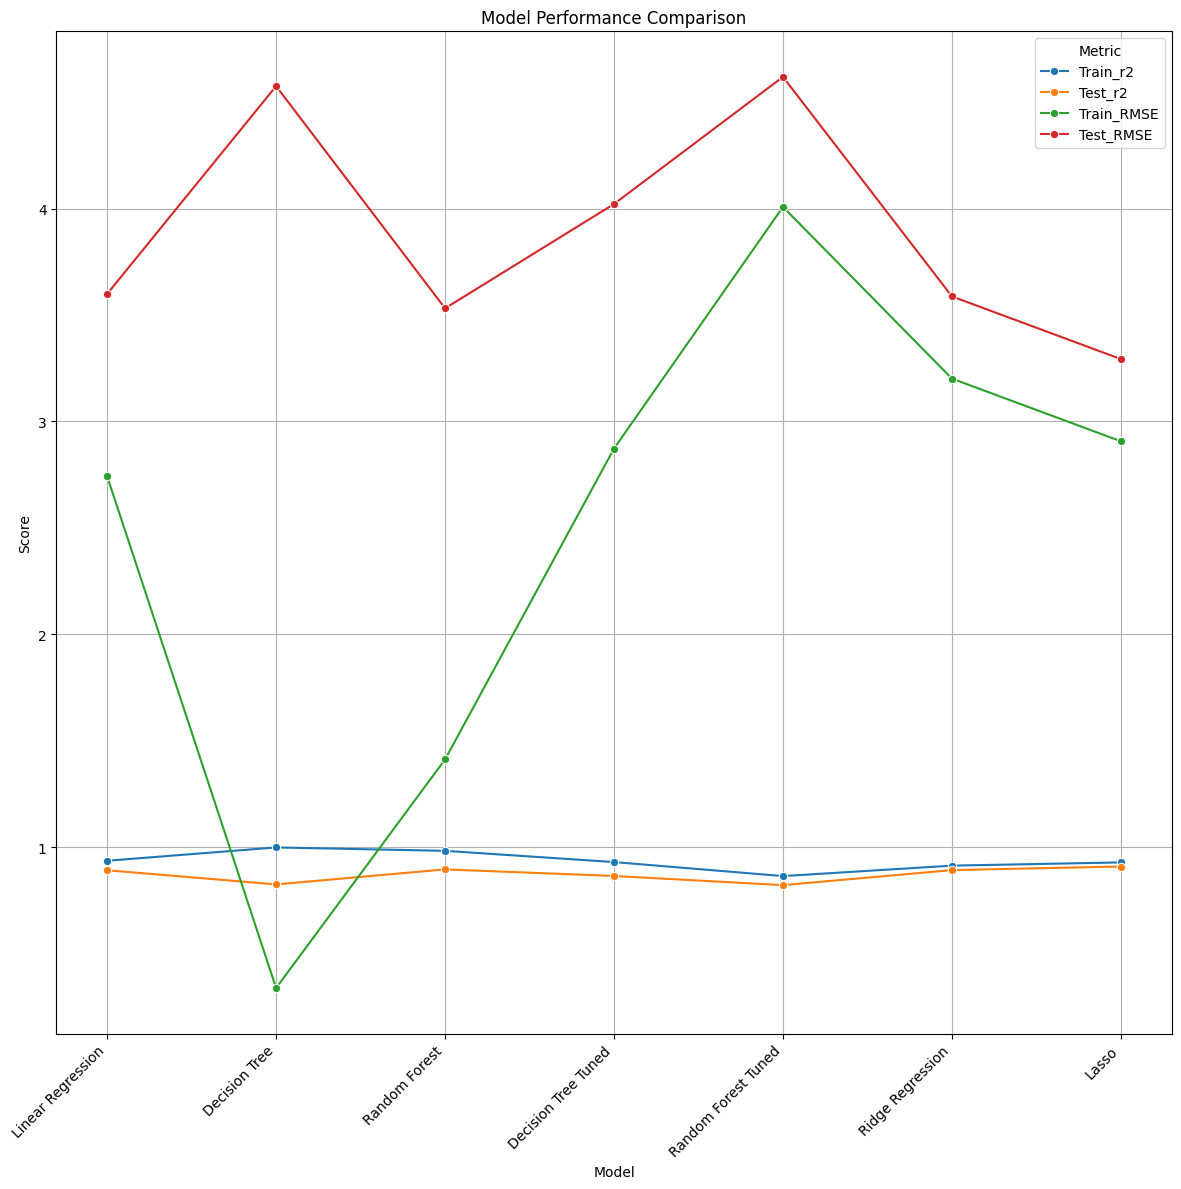

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'comparison_frame' DataFrame created as described in the previous response

# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(comparison_frame, id_vars=['Model'], value_vars=['Train_r2', 'Test_r2','Train_RMSE','Test_RMSE'], var_name='Metric', value_name='Score')

# Create the line plot
plt.figure(figsize=(12, 12))  # Adjust figure size as needed
sns.lineplot(x='Model', y='Score', hue='Metric', data=melted_df, marker='o')

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Linear regression has best performance, the train and test R2 are very close and the test R2 is highest. It is because things have a linear relationship. When companies are pricing cars they are already being very systematic in pricing them. There isnt much to the whim of the sellers or buyers about how the prices work.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?

ustification:
Performance: Ridge Regression demonstrated the best performance among the models explored, achieving a higher R-squared and lower RMSE on the test set. This indicates that the model accurately predicts used car prices and explains a substantial portion of the variance in the data.
Generalization: Ridge Regression's regularization technique helps mitigate overfitting, ensuring the model generalizes well to unseen data and avoids being overly sensitive to the training set.
Interpretability: While not as interpretable as a Decision Tree, the coefficients of Ridge Regression can still provide insights into the relative importance of different features in predicting price.
Simplicity: Ridge Regression is relatively simple to implement and tune, making it a good choice for practical applications.
Expected Benefits and Costs:
Benefits:

Improved Pricing Decisions: Using the model, car businesses can set more accurate and competitive prices for their used cars, leading to increased sales and profitability.
Estimated Benefit: Assume a 1% increase in sales due to optimized pricing, leading to an additional $100,000 in annual revenue (assuming average car price of $10,000 and 10,000 cars sold annually).
Reduced Time and Effort: Automating pricing with the model saves time and effort for employees who would otherwise manually assess car values, freeing them for other tasks.
Estimated Benefit: Assume a 5% reduction in labor costs associated with pricing, resulting in $50,000 in annual savings.
Enhanced Customer Experience: Offering fair and transparent pricing builds trust and improves customer satisfaction, leading to repeat business and positive word-of-mouth referrals.
Estimated Benefit: Difficult to quantify, but can be measured through customer satisfaction surveys and repeat purchase rates.
Costs:

Development and Deployment: Building and deploying the model incurs costs for data scientists, software engineers, and infrastructure.
Estimated Cost: 50,000 for initial development and 10,000 per year for ongoing maintenance.
Data Acquisition and Maintenance: Obtaining and maintaining accurate data for the model requires resources and ongoing effort.
Estimated Cost: 20,000 per year for data acquisition and maintenance.
Model Monitoring and Updates: Regularly monitoring and updating the model ensures it remains accurate and effective as market conditions change.
Estimated Cost: 5,000 per year for monitoring and updates.
Solution Design:
Data Collection: Gather data on relevant features, including Power, Year, New_price, Location, Fuel Type, etc.
Data Preprocessing: Clean the data, handling missing values and outliers as done in the initial exploration.
Model Training: Train the Ridge Regression model using the preprocessed data.
Model Deployment: Integrate the model into the pricing system or tool used by the business.
Model Monitoring: Track model performance and update it as needed to maintain accuracy.
By adopting this solution, car businesses can leverage the power of data-driven decision-making to optimize their pricing strategies and maximize profitability.